In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

pd.set_option('display.max_columns', None)
pd.options.display.max_columns=999

import warnings
warnings.filterwarnings('ignore')

from IPython.core.display import display, HTML # fit cells to screen
display(HTML("<style>.container { width:95% !important; }</style>"))

In [3]:
PFFScouting = pd.read_csv('nfl-big-data-bowl-2022/PFFScoutingData.csv')
PFFScouting

,gameId,playId,snapDetail,snapTime,operationTime,hangTime,kickType,kickDirectionIntended,kickDirectionActual,returnDirectionIntended,returnDirectionActual,missedTackler,assistTackler,tackler,kickoffReturnFormation,gunners,puntRushers,specialTeamsSafeties,vises,kickContactType
0,2018090600,37,NaN,NaN,NaN,3.85,D,R,R,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,PHI 23; PHI 27,NaN,NaN
1,2018090600,366,OK,0.84,2.12,4.46,N,C,C,C,R,PHI 57,NaN,PHI 54,NaN,PHI 18; PHI 29,NaN,NaN,ATL 83; ATL 27; ATL 34; ATL 21,CC
2,2018090600,658,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PHI 58,NaN,NaN
3,2018090600,677,NaN,NaN,NaN,4.06,D,R,R,C,C,ATL 83,ATL 22,ATL 27,8-0-2,NaN,NaN,ATL 17; ATL 22,NaN,NaN
4,2018090600,872,OK,0.84,2.00,4.35,N,C,L,NaN,NaN,NaN,NaN,NaN,NaN,PHI 18; PHI 29,ATL 85,ATL 37,ATL 83; ATL 34; ATL 21,BF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,NaN,NaN,NaN,4.19,D,L,L,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
19975,2021010315,3870,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SF 20; SF 51,NaN,NaN
19976,2021010315,3886,NaN,NaN,NaN,3.88,D,L,L,NaN,NaN,NaN,NaN,NaN,8-0-2,NaN,NaN,SEA 28; SEA 99,NaN,NaN
19977,2021010315,4166,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SEA 37; SEA 54,NaN,NaN


In [4]:
Games = pd.read_csv('nfl-big-data-bowl-2022/games.csv')
Games

,gameId,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
0,2018090600,2018,1,09/06/2018,20:20:00,PHI,ATL
1,2018090900,2018,1,09/09/2018,13:00:00,BAL,BUF
2,2018090901,2018,1,09/09/2018,13:00:00,CLE,PIT
3,2018090902,2018,1,09/09/2018,13:00:00,IND,CIN
4,2018090903,2018,1,09/09/2018,13:00:00,MIA,TEN
...,...,...,...,...,...,...,...
759,2021010311,2020,17,01/03/2021,16:25:00,DEN,LV
760,2021010312,2020,17,01/03/2021,16:25:00,HOU,TEN
761,2021010313,2020,17,01/03/2021,16:25:00,IND,JAX
762,2021010314,2020,17,01/03/2021,16:25:00,LA,ARI


In [5]:
Players = pd.read_csv('nfl-big-data-bowl-2022/players.csv')
Players

,nflId,height,weight,birthDate,collegeName,Position,displayName
0,42901,6-1,208,1992-07-25,James Madison,SS,Dean Marlowe
1,43501,6-0,220,1994-08-11,Central Michigan,FS,Kavon Frazier
2,43534,6-0,205,1993-06-02,Illinois,SS,Clayton Fejedelem
3,43535,6-1,235,1992-12-22,Temple,MLB,Tyler Matakevich
4,44174,6-1,236,1993-02-22,Texas Tech,ILB,Sam Eguavoen
...,...,...,...,...,...,...,...
2727,33216,6-3,320,06/16/1986,Central Florida,G,Josh Sitton
2728,33184,6-3,265,05/02/1985,Winston-Salem State,DE,William Hayes
2729,45651,5-9,198,06/16/1993,Iowa,WR,Riley McCarron
2730,41284,73,230,1992-10-20,LSU,RB,Jeremy Hill


In [6]:
Plays = pd.read_csv('nfl-big-data-bowl-2022/plays.csv')
Plays

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
0,2018090600,37,J.Elliott kicks 65 yards from PHI 35 to end zo...,1,0,0,PHI,Kickoff,Touchback,44966.0,NaN,NaN,PHI,35,15:00:00,NaN,NaN,NaN,0,0,NaN,66.0,NaN,40,45
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
2,2018090600,658,"(5:03) M.Bryant 21 yard field goal is GOOD, Ce...",1,4,3,ATL,Field Goal,Kick Attempt Good,27091.0,NaN,NaN,PHI,3,05:03:00,NaN,NaN,NaN,0,0,NaN,21.0,NaN,0,13
3,2018090600,677,M.Bosher kicks 64 yards from ATL 35 to PHI 1. ...,1,0,0,ATL,Kickoff,Return,37267.0,44979,NaN,ATL,35,05:01:00,NaN,NaN,NaN,0,3,NaN,64.0,30.0,34,75
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19974,2021010315,3683,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,02:20:00,NaN,NaN,NaN,16,19,NaN,75.0,NaN,40,75
19975,2021010315,3870,"J.Myers extra point is GOOD, Center-T.Ott, Hol...",4,0,0,SEA,Extra Point,Kick Attempt Good,41175.0,NaN,NaN,SF,15,01:49:00,NaN,NaN,NaN,16,25,NaN,NaN,NaN,0,25
19976,2021010315,3886,J.Myers kicks 65 yards from SEA 35 to end zone...,4,0,0,SEA,Kickoff,Touchback,41175.0,NaN,NaN,SEA,35,01:49:00,NaN,NaN,NaN,16,26,NaN,75.0,NaN,40,75
19977,2021010315,4166,"T.Vizcaino extra point is GOOD, Center-C.Holba...",4,0,0,SF,Extra Point,Kick Attempt Good,47590.0,NaN,NaN,SEA,15,00:23:00,NaN,NaN,NaN,22,26,NaN,NaN,NaN,0,95


#### Let's look at the different possible play types

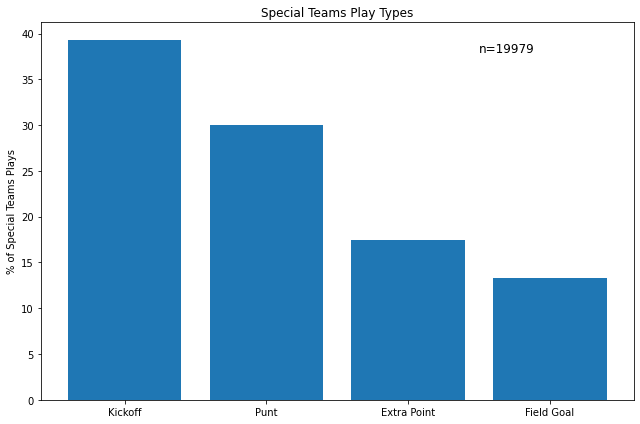

In [66]:
playtypes = (Plays.groupby('specialTeamsPlayType').count()/len(Plays)).sort_values(by='gameId', ascending=False)
plt.figure(figsize=(9,6))
plt.bar(x=range(len(playtypes)), height=playtypes['gameId']*100)
plt.xticks(ticks=range(len(playtypes)), labels=playtypes.index)
plt.ylabel('% of Special Teams Plays')
plt.title('Special Teams Play Types')
plt.text(x=2.5,y=38, s=f"n={len(Plays)}", fontsize=12)
plt.tight_layout()

### I want to see which punters have generated the best defensive field position through their punts

In [13]:
Punts = Plays[Plays['specialTeamsPlayType'] == 'Punt']
Punts

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
5,2018090600,973,"(14:18) M.Bosher punts 49 yards to PHI 40, Cen...",2,4,19,ATL,Punt,Fair Catch,37267.0,29957,NaN,ATL,11,14:18:00,NaN,NaN,NaN,0,3,NaN,49.0,NaN,49,21
10,2018090600,1850,"(1:30) C.Johnston punts 58 yards to ATL 11, Ce...",2,4,8,PHI,Punt,Downed,45603.0,NaN,NaN,PHI,31,01:30:00,NaN,NaN,NaN,3,6,NaN,58.0,NaN,58,79
11,2018090600,1989,"(:44) M.Bosher punts 57 yards to PHI 17, Cente...",2,4,8,ATL,Punt,Return,37267.0,29957,NaN,ATL,26,00:44:00,UNR,PHI 50,12.0,3,6,NaN,57.0,8.0,61,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,2021010315,1359,"(8:17) M.Wishnowsky punts 45 yards to SEA 35, ...",2,4,15,SF,Punt,Return,47893.0,46211,NaN,SF,20,08:17:00,IBW,SEA 18,10.0,0,6,NaN,45.0,7.0,48,90
19958,2021010315,1479,"(6:47) M.Dickson punts 61 yards to SF 16, Cent...",2,4,19,SEA,Punt,Return,46218.0,45900,NaN,SEA,23,06:47:00,NaN,NaN,NaN,0,6,NaN,61.0,5.0,56,33
19964,2021010315,2235,"(8:39) M.Dickson punts 43 yards to SF 30, Cent...",3,4,8,SEA,Punt,Return,46218.0,45900,NaN,SEA,27,08:39:00,NaN,NaN,NaN,6,6,NaN,43.0,21.0,22,37
19967,2021010315,2497,"(5:17) M.Dickson punts 52 yards to SF 22, Cent...",3,4,9,SEA,Punt,Return,46218.0,45900,NaN,SEA,26,05:17:00,NaN,NaN,NaN,9,6,NaN,52.0,5.0,47,36


#### How many different punters are there in this dataset?

In [17]:
print(len(Punts['kickerId'].unique()), 'different punters')

54 different punters


#### What are the possible results from punts in this dataset?

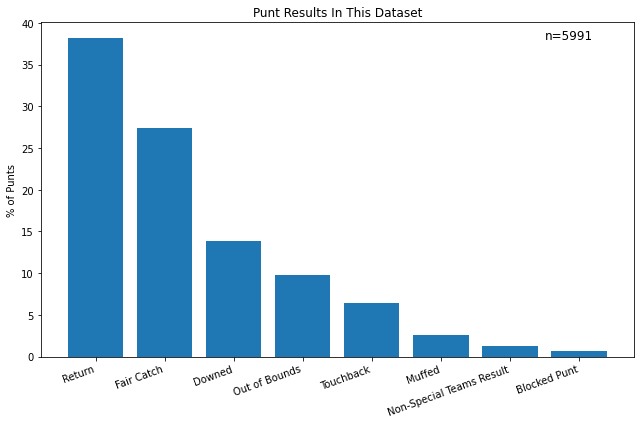

In [67]:
puntresults = (Punts.groupby('specialTeamsResult').count()/len(Punts)).sort_values(by='gameId', ascending=False)
plt.figure(figsize=(9,6))
plt.bar(x=range(len(puntresults)), height=puntresults['gameId']*100)
plt.xticks(ticks=range(len(puntresults)), labels=puntresults.index, rotation=20, horizontalalignment='right')
plt.ylabel('% of Punts')
plt.title('Punt Results In This Dataset')
plt.text(x=6.5,y=38, s=f"n={len(Punts)}", fontsize=12)
plt.tight_layout()

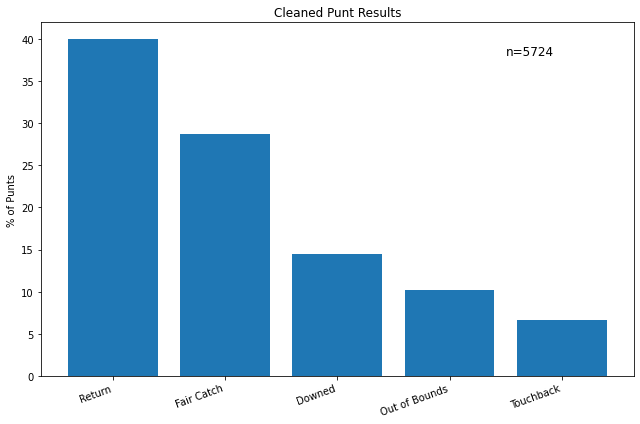

In [68]:
# Let's get rid of 'Muffed', 'Non-Special Teams Result',  and 'Blocked Punt' plays for the purposes
rejects = ['Muffed', 'Non-Special Teams Result', 'Blocked Punt']
Punts_cleaned = Punts[~Punts['specialTeamsResult'].isin(rejects)]
puntresults_cleaned = (Punts_cleaned.groupby('specialTeamsResult').count()/len(Punts_cleaned)).sort_values(by='gameId', ascending=False)
plt.figure(figsize=(9,6))
plt.bar(x=range(len(puntresults_cleaned)), height=puntresults_cleaned['gameId']*100)
plt.xticks(ticks=range(len(puntresults_cleaned)), labels=puntresults_cleaned.index, rotation=20, horizontalalignment='right')
plt.ylabel('% of Punts')
plt.title('Cleaned Punt Results')
plt.text(x=3.5,y=38, s=f"n={len(Punts_cleaned)}", fontsize=12)
plt.tight_layout()

In [71]:
Punts_cleaned

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45
5,2018090600,973,"(14:18) M.Bosher punts 49 yards to PHI 40, Cen...",2,4,19,ATL,Punt,Fair Catch,37267.0,29957,NaN,ATL,11,14:18:00,NaN,NaN,NaN,0,3,NaN,49.0,NaN,49,21
10,2018090600,1850,"(1:30) C.Johnston punts 58 yards to ATL 11, Ce...",2,4,8,PHI,Punt,Downed,45603.0,NaN,NaN,PHI,31,01:30:00,NaN,NaN,NaN,3,6,NaN,58.0,NaN,58,79
11,2018090600,1989,"(:44) M.Bosher punts 57 yards to PHI 17, Cente...",2,4,8,ATL,Punt,Return,37267.0,29957,NaN,ATL,26,00:44:00,UNR,PHI 50,12.0,3,6,NaN,57.0,8.0,61,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19957,2021010315,1359,"(8:17) M.Wishnowsky punts 45 yards to SEA 35, ...",2,4,15,SF,Punt,Return,47893.0,46211,NaN,SF,20,08:17:00,IBW,SEA 18,10.0,0,6,NaN,45.0,7.0,48,90
19958,2021010315,1479,"(6:47) M.Dickson punts 61 yards to SF 16, Cent...",2,4,19,SEA,Punt,Return,46218.0,45900,NaN,SEA,23,06:47:00,NaN,NaN,NaN,0,6,NaN,61.0,5.0,56,33
19964,2021010315,2235,"(8:39) M.Dickson punts 43 yards to SF 30, Cent...",3,4,8,SEA,Punt,Return,46218.0,45900,NaN,SEA,27,08:39:00,NaN,NaN,NaN,6,6,NaN,43.0,21.0,22,37
19967,2021010315,2497,"(5:17) M.Dickson punts 52 yards to SF 22, Cent...",3,4,9,SEA,Punt,Return,46218.0,45900,NaN,SEA,26,05:17:00,NaN,NaN,NaN,9,6,NaN,52.0,5.0,47,36


In [89]:
# Create a pure punt metric
# This is the absolute yardnumber of the opponent
#    following the punt with penalty yards ignored
# A second form is also created that also removes the return yards
start = time.time()
Punts_cleaned['oppFieldPos'] = np.nan
Punts_cleaned['oppFieldPosNoReturn'] = np.nan
for i in Punts_cleaned.index:
    if (Punts_cleaned['specialTeamsResult'][i] == 'Touchback'):
        Punts_cleaned['oppFieldPosNoReturn'][i] = 75
        Punts_cleaned['oppFieldPos'][i] = 75
    else:
        if (Punts_cleaned['possessionTeam'][i] == Punts_cleaned['yardlineSide'][i]):
            yards_to_endzone = 100 - Punts_cleaned['yardlineNumber'][i]
        else: yards_to_endzone = Punts_cleaned['yardlineNumber'][i]
        Punts_cleaned['oppFieldPos'][i] = 100 - (yards_to_endzone - Punts_cleaned['kickLength'][i] + np.nan_to_num(Punts_cleaned['kickReturnYardage'][i]))
        Punts_cleaned['oppFieldPosNoReturn'][i] = 100 - (yards_to_endzone - Punts_cleaned['kickLength'][i])

stop = time.time()
print('Took', round(stop-start,2), 'seconds')

Punts_cleaned.head(3)

Took 6.65 seconds


,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,returnerId,kickBlockerId,yardlineSide,yardlineNumber,gameClock,penaltyCodes,penaltyJerseyNumbers,penaltyYards,preSnapHomeScore,preSnapVisitorScore,passResult,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,oppFieldPos,oppFieldPosNoReturn
1,2018090600,366,"(9:20) C.Johnston punts 56 yards to ATL 36, Ce...",1,4,4,PHI,Punt,Return,45603.0,42450,NaN,PHI,8,09:20:00,UNSd,PHI 18,-15.0,0,0,NaN,56.0,5.0,36,18,59.0,64.0
4,2018090600,872,"(:33) C.Johnston punts 65 yards to end zone, C...",1,4,18,PHI,Punt,Touchback,45603.0,NaN,NaN,PHI,35,00:33:00,NaN,NaN,NaN,0,3,NaN,65.0,NaN,45,45,75.0,75.0
5,2018090600,973,"(14:18) M.Bosher punts 49 yards to PHI 40, Cen...",2,4,19,ATL,Punt,Fair Catch,37267.0,29957,NaN,ATL,11,14:18:00,NaN,NaN,NaN,0,3,NaN,49.0,NaN,49,21,60.0,60.0


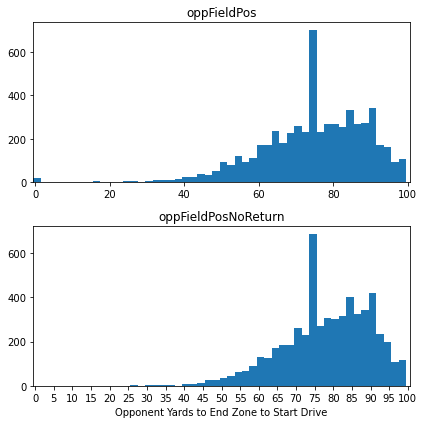

In [90]:
fig, ax = plt.subplots(2, 1, figsize=(6,6))
ax[0].hist(Punts_cleaned['oppFieldPos'], bins=np.arange(-0.5,100.5,2))
ax[0].set_title('oppFieldPos')
ax[0].set_xlim(-0.5,100.5)
ax[1].set_xticks(np.arange(0,102,5))
ax[1].hist(Punts_cleaned['oppFieldPosNoReturn'], bins=np.arange(-0.5,100.5,2))
ax[1].set_title('oppFieldPosNoReturn')
ax[1].set_xlim(-0.5,100.5)
ax[1].set_xticks(np.arange(0,102,5))
ax[1].set_xlabel('Opponent Yards to End Zone to Start Drive')
plt.tight_layout()

In [119]:
Punter_results = Punts_cleaned.groupby('kickerId').agg(['mean', 'count'])[['oppFieldPos', 'oppFieldPosNoReturn']]
#Punter_counts = Punts_cleaned.groupby('kickerId').count()
Punter_results['kickerName'] = np.nan
for punterId in Punter_results.index:
    Punter_results.loc[punterId, 'kickerName'] = Players[Players['nflId'] == punterId]['displayName'].iloc[0]
print(len(Punter_results), 'punters')
to_drop = []
for punterId in Punter_results.index:
    if (Punter_results.loc[punterId, 'oppFieldPos']['count'] < 50): to_drop.append(punterId)
Punter_results = Punter_results.drop(index=to_drop)
print(len(Punter_results), 'punters with at least 50 non-blocked and non-muffed punts')
Punter_results.head()


53 punters
39 punters with at least 50 non-blocked and non-muffed punts


oppFieldPos       oppFieldPosNoReturn             kickerName
                mean count                mean count                 
kickerId                                                             
29141.0    74.090000   200           78.510000   200         Andy Lee
29926.0    75.393939    99           77.919192    99  Dustin Colquitt
31018.0    77.310811   148           80.851351   148         Sam Koch
33338.0    77.659341   182           81.263736   182       Brett Kern
34593.0    74.221106   199           76.738693   199      Kevin Huber

In [134]:
#P_Res_sorted = Punter_results[['oppFieldPos']['mean']
#P_Res_sorted = Punter_results.sort_values(by=['oppFieldPos','mean'], ascending=False)
#P_Res_sorted
Punter_results.sort_values(by=('oppFieldPos','mean'), ascending=False)

oppFieldPos       oppFieldPosNoReturn                 kickerName
                mean count                mean count                     
kickerId                                                                 
47946.0    79.925000   120           81.916667   120          Jake Bailey
48258.0    79.428571    56           81.392857    56             Jack Fox
48335.0    78.737864   103           82.679612   103            A.J. Cole
33338.0    77.659341   182           81.263736   182           Brett Kern
31018.0    77.310811   148           80.851351   148             Sam Koch
38600.0    76.691781   146           79.465753   146          Bryan Anger
34615.0    76.666667   153           78.366013   153      Thomas Morstead
45153.0    76.533333   150           79.166667   150    Rigoberto Sanchez
38815.0    76.269006   171           79.625731   171        Johnny Hekker
46218.0    76.100000   190           79.568421   190      Michael Dickson
46810.0    76.098765    81           79.481481    81        Trevor Daniel
46316.0    75.939086   197           78.167513   197          Logan Cooke
40600.0    75.562791   215           79.413953   215            Tress Way
45603.0    75.532609   184           78.956522   184     Cameron Johnston
40113.0    75.520202   198           79.000000   198           Sam Martin
29926.0    75.393939    99           77.919192    99      Dustin Colquitt
42333.0    75.227027   185           78.459459   185         Jordan Berry
43517.0    75.151042   192           77.968750   192          Riley Dixon
40437.0    75.038835   103           78.825243   103           Ryan Allen
46903.0    74.810458   153           77.555556   153      Corey Bojorquez
47893.0    74.771429   105           77.723810   105     Mitch Wishnowsky
45296.0    74.526316   209           78.846890   209           Matt Haack
41420.0    74.413613   191           77.879581   191        Pat O'Donnell
48139.0    74.378641   103           77.689320   103         Jamie Gillan
42907.0    74.269841    63           77.380952    63            Matt Wile
34593.0    74.221106   199           76.738693   199          Kevin Huber
29141.0    74.090000   200           78.510000   200             Andy Lee
34723.0    73.724138   174           78.000000   174     Britton Colquitt
37267.0    73.578125    64           76.500000    64          Matt Bosher
42098.0    73.363636   121           78.768595   121      Michael Palardy
46241.0    72.962162   185           76.410811   185           J.K. Scott
42508.0    72.475309   162           76.234568   162       Bradley Pinion
45986.0    71.747967   123           76.642276   123         Colby Wadman
52636.0    71.440000    50           74.140000    50  Sterling Hofrichter
43524.0    71.159236   157           74.980892   157      Lachlan Edwards
38138.0    70.454545   121           73.859504   121          Chris Jones
46242.0    70.263889    72           73.972222    72      Johnny Townsend
42663.0    70.049505   101           77.910891   101              Ty Long
52599.0    67.644737    76           73.473684    76          Braden Mann

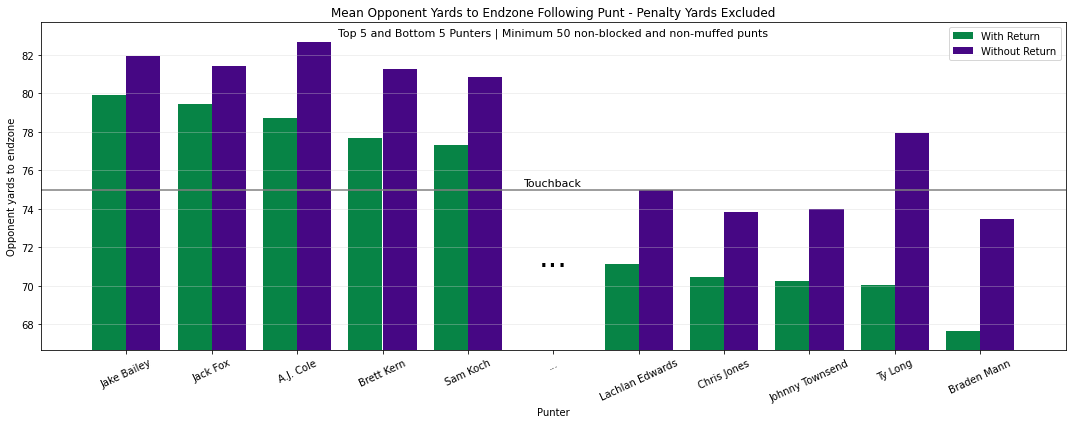

In [206]:
fill1 = '#078446'
fill2 = '#460784'

n=5
P_Res_sorted = Punter_results.sort_values(by=('oppFieldPos','mean'), ascending=False)
plt.figure(figsize=(n*2*1.5,6))

plt.bar(x=np.array(range(n))-0.2, height=P_Res_sorted['oppFieldPos']['mean'].iloc[:n], color=fill1, width=0.4, label='With Return')
plt.bar(x=np.array(range(n))+0.2, height=P_Res_sorted['oppFieldPosNoReturn']['mean'].iloc[:n], color=fill2, width=0.4, label='Without Return')
plt.bar(x=[n], height=0)
plt.bar(x=np.array(range(n+1, n+n+1))-0.2, height=P_Res_sorted['oppFieldPos']['mean'].iloc[-1*n:], color=fill1, width=0.4)
plt.bar(x=np.array(range(n+1, n+n+1))+0.2, height=P_Res_sorted['oppFieldPosNoReturn']['mean'].iloc[-1*n:], color=fill2, width=0.4)
labels = list(P_Res_sorted['kickerName'].iloc[:n]) + ['...'] + list(P_Res_sorted['kickerName'].iloc[-1*n:])
plt.xticks(ticks=range(n+n+1), labels=labels, rotation=25)

ymin = min(P_Res_sorted['oppFieldPos']['mean'].min(), P_Res_sorted['oppFieldPosNoReturn']['mean'].min()) - 1
ymax = max(P_Res_sorted['oppFieldPos']['mean'].max(), P_Res_sorted['oppFieldPosNoReturn']['mean'].max()) + 1
plt.ylim((ymin,ymax))
plt.text(x=n, y=71, s="...", fontsize=30, horizontalalignment='center')
plt.grid(axis='y', color='lightgrey', alpha=0.4)
plt.hlines(y=75, xmin=-5, xmax=n*2+1, color='gray')
plt.xlim((-1,n*2+1))
plt.text(x=n, y=75.15, s="Touchback", fontsize=11, horizontalalignment='center')
plt.legend()

plt.ylabel('Opponent yards to endzone')
plt.xlabel('Punter')
plt.title('Mean Opponent Yards to Endzone Following Punt - Penalty Yards Excluded')
plt.text(x=n, y=83, s='Top 5 and Bottom 5 Punters | Minimum 50 non-blocked and non-muffed punts', fontsize=11, horizontalalignment='center')

plt.tight_layout()